# Expert Chase

See the co-located [`README.md`](README.md) for more information.

### Table of Contents

- [1. Dataset: Load and First Exposure](#1.-Dataset:-Load-and-First-Exposure)
    - [1.1 First Exposure: Findings and Next Steps](#1.1-First-Exposure:-Findings-and-Next-Steps)
- [2. Data Preprocessing, Cleaning and Basic Feature Engineering](#2.-Data-Preprocessing,-Cleaning-and-Basic-Feature-Engineering)
    - [2.1 Drop NAs](#2.1-Drop-NAs)
    - [2.2 Process Countries and Emails](#2.2-Process-Countries-and-Emails)
    - [2.3 Process Timestamp](#2.3-Process-Timestamp)
    - [2.4 Assemble Engineerd Columns](#2.4-Assemble-Engineerd-Columns)
    - [2.5 Reduce Entries to Experts](#2.5-Reduce-Entries-to-Experts)
        - Persist Preprocesed Dataset
        - New Reduced Dataset
    - [2.6 Data Processing: Findings and Next Steps](#2.6-Data-Processing:-Findings-and-Next-Steps)
- [3. More Exploratory Data Analysis and Hypothesis Testing](#3.-More-Exploratory-Data-Analysis-and-Hypothesis-Testing)
    - [3.1 Plots](#3.1-Plots)
        - Ranking Distributions
        - Box Plots
        - Bar Plots
    - [3.2 Hypothesis Tests](#3.2-Hypothesis-Tests)
        - Auxiliary Functions: T Test, Z Test
        - Hypothesis Tests
    - [3.3 EDA and Hypothesis Tests: Findings](#3.3-EDA-and-Hypothesis-Tests:-Findings)
- [4. Modeling: First Approach](#4.-Modeling:-First-Approach)

## 1. Dataset: Load and First Exposure

Prior to any data analysis and modeling, we need to load and understand the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats.distributions as dist
import scipy.stats as stats

In [2]:
df = pd.read_csv('data/data_Nov_2022.csv')

In [3]:
df.shape

(371804, 7)

In [4]:
df.tail()

,person-id,timestamp,search-id,search-ranking,countries,email-domains,outreach-success
371799,1fdc9fe9-b2bf-49fd-a205-5182eb8a2816,2021-05-18T11:17:37.625000,f18d6829-5eb8-4df1-bd56-40a383f2a5d8,996,US,"unc.edu,med.unc.edu",0
371800,a150e234-1452-4211-b6c3-efd1c6003056,2021-05-18T11:17:37.625000,f18d6829-5eb8-4df1-bd56-40a383f2a5d8,997,US,msx.upmc.edu,0
371801,668dd801-9b5d-4969-a2c5-9e694bdcc006,2021-05-18T11:17:37.625000,f18d6829-5eb8-4df1-bd56-40a383f2a5d8,998,US,omrf.org,0
371802,57900bb4-fb62-4a07-949b-b4f27d04e8b9,2021-05-18T11:17:37.625000,f18d6829-5eb8-4df1-bd56-40a383f2a5d8,999,US,hss.edu,0
371803,466185f8-54a0-473a-bde5-6a8692f1b4fb,2021-05-18T11:17:37.625000,f18d6829-5eb8-4df1-bd56-40a383f2a5d8,1000,US,hss.edu,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371804 entries, 0 to 371803
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   person-id         371804 non-null  object
 1   timestamp         371804 non-null  object
 2   search-id         371804 non-null  object
 3   search-ranking    371804 non-null  int64 
 4   countries         371794 non-null  object
 5   email-domains     371793 non-null  object
 6   outreach-success  371804 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 19.9+ MB


In [6]:
# Number of NAs due to values in countries and email-domains
# Warning: there're might be other NAs encoded as strings...
df.isna().sum(axis=1).replace({2:1}).sum(axis=0)

11

In [7]:
# Unique country values: we need to split them, also there are NaNs
df.countries.unique()

array(['US', 'None', nan, 'IT,US', 'US,TW', 'US,FR', 'US,IO', 'US,IL',
       'GB,US', 'US,SG', 'CA,US', 'GR,US', 'CH,US', 'US,BR', 'LB,US',
       'DE,US', 'ET,US', 'PH,US', 'NZ,US', 'RS,US', 'IE,US', 'NE,US',
       'SY,US', 'US,UA', 'US,PR', 'DE', 'US,AU', 'AR,US', 'US,TR',
       'US,MY', 'PK,US,GU', 'US,GY', 'US,DE', 'US,RS', 'US,PL', 'US,JP',
       'US,GB', 'AU,US', 'MX,US', 'US,LB', 'EG,US', 'US,CO', 'US,AE',
       'US,VE', 'US,FI', 'US,IT', 'TW,US', 'US,JE', 'US,ES', 'US,SE',
       'US,HK', 'CN,US', 'US,IR', 'LT,US', 'US,BD', 'PS,US', 'DK,US',
       'US,KR', 'US,LR', 'PK,US', 'NL,US', 'CA', 'US,CA', 'GB,ES', 'ES',
       'IT', 'FR', 'FR,DE,GB,IT', 'FR,ES', 'GB,IT', 'FR,DE', 'GB',
       'DE,ES', 'DE,GB', 'DE,IT', 'IT,ES', 'FR,GB', 'GB,IT,ES', 'FR,IT',
       'DE,AT', 'US,CH', 'US,NO', 'US,BO', 'BE,US', 'AE,US', 'US,PF',
       'US,SA', 'US,EG', 'US,PH', 'US,VN', 'US,PA', 'US,NE', 'US,ZA',
       'US,ID', 'US,LT', 'US,HN', 'US,DK', 'IO,US', 'US,PT', 'BR',
       'BR,US', 'BR

<AxesSubplot: ylabel='Frequency'>

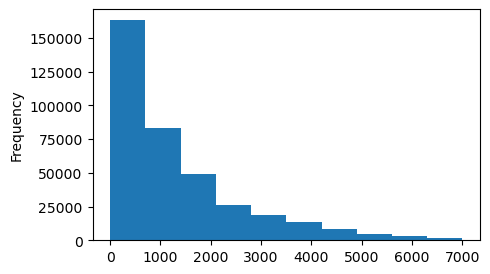

In [8]:
# Ranking histogram
df['search-ranking'].plot(kind='hist', figsize=(5,3))

In [9]:
# We have 371804 entries, but only 284 unique search-ids
len(df['search-id'].unique())

284

In [10]:
# Each search has a number of ranking results, probably manually defined
# The following list shows how many times each number of ranking results appears
# E.g., a ranking list of length 1000 was the most common and appears in 70 searches
# a ranking list of length 250 is the least common and appears in 1 search
df.groupby('search-id')['search-ranking'].max().value_counts()

1000    70
500     44
2000    35
300     25
800     19
4000    11
3000    10
1500    10
100      8
200      8
5000     6
600      5
900      5
2500     5
50       5
6000     4
1        4
400      4
7000     2
1400     1
3500     1
700      1
250      1
Name: search-ranking, dtype: int64

In [11]:
# Unique email domains: as with countries, we need to split them 
len(df['email-domains'].unique())

43543

In [12]:
# We have 371804 entries, but only 167109 unique person-ids
len(df['person-id'].unique())

167109

In [13]:
# We have 284 timestamps
len(df['timestamp'].unique())

284

In [14]:
# Each timestamp is related to a search-id
df.groupby('search-id')['timestamp'].nunique().sum()

284

In [15]:
# Outreach success rate: 0.4%
success = df['outreach-success'].value_counts()
print(success)
print(f"\nOutreach-success ratio: {success[1]/df.shape[0]}")

0    370270
1      1534
Name: outreach-success, dtype: int64

Outreach-success ratio: 0.004125829738249185


<AxesSubplot: ylabel='Frequency'>

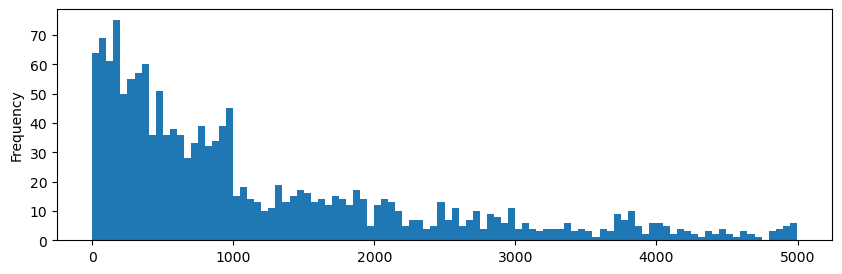

In [16]:
# For positive responses, which is the ranking distirbution?
# As expected, there are more high ranking values in positive responses: we have an exponential decaying distribution.
df[df['outreach-success'] == 1]['search-ranking'].plot(kind='hist', bins=100, figsize=(10,3))

### 1.1 First Exposure: Findings and Next Steps

Summary od findings:

- Countries and emails have NAs, 11 entries are affected. Additionally, some NAs are encoded as strings ('None', 'NONE').
- We have 371804 entries, but only 167109 unique person-ids.
- We have 371804 entries, but only 284 unique search-ids, which have their own timestamp; the search-id could be probably dropped, since the timestamp might contain its category information and additional time information (month, etc.).
- Search outcome/ranking lenths vary from 1 to 7000; a ranking length 1000 is the most common, 250 the least common. 
- The current `outreach-success` rate is 0.4%; the dataset is very imbalanced, particularly, if `outreach-success` is used as target. 
- As expected, there are more high ranking values in positive responses: we have an exponential decaying distribution.

Questions:

- How is ranking determined?
- Could we get more information about expert candidates? E.g., years of experience, number of companies they've worked in, whether they've done conosulting or not, etc.
- Are there candidates who don't respond in the initial contact(s) (outreach-success 0), but they end up responding? Which are their features? I can imagine there's a technical term for those candidates...

Next steps:

- Drop NAs.
- Countries and emails need to be split into categories; seems easy, because text appears to be quite clean.
- Process timestamp.
- Reduce dataset to a single entry per expert.

Extra points:

- Maybe the number of countries/emails a person has is relevant (feature engineering).

## 2. Data Preprocessing, Cleaning and Basic Feature Engineering

Goals:

- Drop NAs.
- Countries and emails need to be split into categories; analyze 
- Process timestamp.
- Reduce dataset to a single entry per expert.


In [17]:
df_org = df.copy()

### 2.1 Drop NAs

In [18]:
# Some countries entries have values None and NONE -> we need to encode them correctly
df['countries'].replace({'None': None, 'NONE': None}, inplace=True)
# The same happens with emails
df['email-domains'].replace({'None': None}, inplace=True)

In [19]:
# We can safely remove the NAs, because they affect to only 11 entries
# and they appear in the features that I assume to be most predictive: country and email-domain
# Also I remove duplicates, autmatically, but there seem to be no duplicates.
df = df.dropna()
df = df.drop_duplicates().reset_index(drop=True)
df.head()

,person-id,timestamp,search-id,search-ranking,countries,email-domains,outreach-success
0,93033378-8207-4c9f-bfa5-95b520f7c760,2021-05-26T14:31:54.307000,a6380bba-b203-48dc-bbd6-5cb58b12ee07,1,US,ub.edu,0
1,18a3bd6b-5665-4f08-aae4-66f2219100b3,2021-05-26T14:31:54.307000,a6380bba-b203-48dc-bbd6-5cb58b12ee07,2,US,bcm.edu,0
2,21e9d97a-0940-4fcf-825a-e4a118d01b1b,2021-05-26T14:31:54.307000,a6380bba-b203-48dc-bbd6-5cb58b12ee07,3,US,nemours.org,0
3,aUlZWRzbXY7Ev5VCWo8Zag_0000,2021-05-26T14:31:54.307000,a6380bba-b203-48dc-bbd6-5cb58b12ee07,4,US,"mssm.edu,sangabrieleye.com,usc.edu",0
4,2e23c461-d817-4d6c-af0b-b3567e63b878,2021-05-26T14:31:54.307000,a6380bba-b203-48dc-bbd6-5cb58b12ee07,5,US,"ucsf.edu,virginia.edu",0


In [20]:
# New number of entries: 371790
df.shape

(371772, 7)

### 2.2 Process Countries and Emails

In [21]:
# Split function
def get_categories(df, column, sep=','):
    """Given a dataframe and a column,
    split the strings in column to get all possible
    categories.
    
    Arguments:
        df: dataframe
        sep: separatr used during splitting
    Returns:
        column: column to apply split to
    """
    categories = set()
    for row in df[column]:
        category_list = row.split(sep)
        for c in category_list:
            categories.add(c)
    
    return categories

In [22]:
# Countries
countries = get_categories(df, 'countries')
#list(countries)

In [23]:
# 117 possible countries: we can encode them as dummy variables
len(countries)

117

In [24]:
sorted(list(countries))[:10]

['AE', 'AI', 'AR', 'AS', 'AT', 'AU', 'AZ', 'BD', 'BE', 'BG']

In [25]:
# Emails
emails = get_categories(df, 'email-domains')

In [26]:
# There are maybe too many unique emails (20355) to encode them as dummy variables
# and use them effectively.
# Probably, we need to compress the information:
# - discipline: oncology, pediatrics, etc.
# - size of institution: small (<50), medium (50-150), large (>150)
# - type of center: university, research center, hospital/clinic, company
# - ...
len(emails)

20355

In [27]:
list(emails)[:100]

['pimc.ihs.gov',
 'klinikum-krefeld.de',
 'cantonmercy.org',
 'cesmpt.ccf.org',
 'bwh.havard.edu',
 'sergas.es',
 'iktz-hd.de',
 'voiceinstituteny.com',
 'rngen.com',
 'chaos.ph.utexas.edu',
 'tpg-group.com',
 'gmiho.de',
 'humanitariansurgery.org',
 'produktqualitaet.com',
 'unat.com',
 'bmtga.com',
 'ch-stquentin.mssante.fr',
 'eerp.usp.br',
 'oncolink.com',
 'etse.urv.es',
 'eurand.com',
 'vivacell.de',
 'oncomed.com',
 'physci.ucla.edu',
 'projhope.org',
 'simson.org',
 'medicalschool-berlin.de',
 'mst1.ukl.uni-freiburg.de',
 'sharmilachatterjee.com',
 'dovpharm.com',
 'wideopenroad.com',
 'kingcounty.gov',
 'mathematik.uni-oldenburg.de',
 'cableinet.co.uk',
 'marycrowley.org',
 'vetagro-sup.fr',
 'neuro.gu.se',
 'mailnih.gov',
 'raphaelsklinik.de',
 'allergyoftherockies.com',
 'adpc.mssante.fr',
 'ulssvicenza.it',
 'libragen.com',
 'jcvi.org',
 'gwpo.ynhh.com',
 'newcastle.edu',
 'providencesb.org',
 'onco.uni-kiel.de',
 'nemushealth.com',
 'sgh.com.sg',
 'unsw.edu.au',
 'mclean.h

In [28]:
def encode_categories(df, column, categories, sep=',', dummy=True):
    """Count the number of categories in a colum
    and perfom manual one-hot encoding if so specified.
    
    Arguments:
        df: data frame
        column: column to analyze
        categories: pre-computed categories from column
            to be counted and encoded
        sep: separator
        dummy: whether one-hot encoding needs to be carried out
    Returns:
        df_column: data frame with counts and, optionally, encoded categories
        cat2index: :dictionary which maps a category with an index
    """
    categories_list = sorted(list(categories))
    num_categories = len(categories_list)
    cat2index = {k:v for v,k in enumerate(categories_list)}
    if dummy:
        column_names = [column+'_'+cat for cat in categories_list]
        column_names.append('num_'+column)
        data = np.zeros((df.shape[0], num_categories+1))
    else:
        column_names = ['num_'+column]
        data = np.zeros((df.shape[0], 1))
    for i, row in enumerate(df[column]):
        category_list = row.split(sep)
        data[i, -1] = len(category_list)
        if dummy:
            for c in category_list:
                data[i, cat2index[c]] += 1
    df_column = pd.DataFrame(data, columns=column_names)
    
    return df_column, cat2index

In [29]:
column = 'countries'
categories = countries
df_country, country_cat2index = encode_categories(df, column, categories)

<AxesSubplot: ylabel='Frequency'>

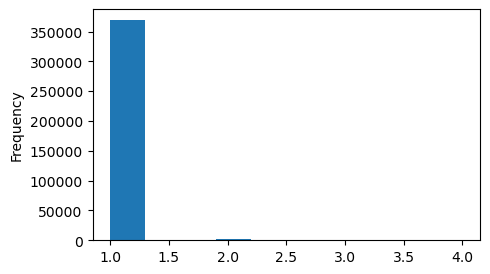

In [30]:
# Most entries have a unique country
df_country['num_countries'].plot(kind='hist', bins=10, figsize=(5,3))

In [31]:
df_country['num_countries'].describe()

count    371772.000000
mean          1.007478
std           0.087451
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: num_countries, dtype: float64

In [32]:
column = 'email-domains'
categories = emails
df_emails, email_cat2index = encode_categories(df, column, categories, sep=',', dummy=False)

<AxesSubplot: ylabel='Frequency'>

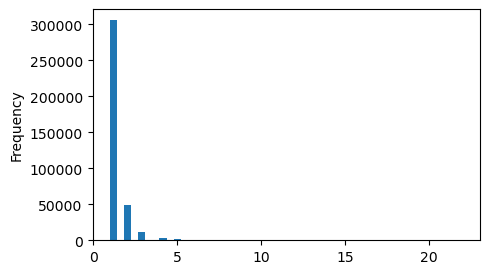

In [33]:
# The number of emails follows an exponential distribution; most entries have one email 
df_emails['num_email-domains'].plot(kind='hist', figsize=(5,3), bins=50)

In [34]:
df_emails['num_email-domains'].describe()

count    371772.000000
mean          1.251910
std           0.664871
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          22.000000
Name: num_email-domains, dtype: float64

In [35]:
# Analyze email extensions
email_extensions = set()
for e in emails:
    email_extensions.add(e.split('.')[-1])

In [36]:
len(email_extensions)

226

In [37]:
email_extensions

{'  ',
 '#NAME?',
 '1',
 '6926c7fd-4f7e-49b5-9b0d-e128cead2a3f',
 'GFHK',
 'None',
 'ac',
 'ae',
 'amc',
 'an',
 'ap',
 'ar',
 'at',
 'att',
 'au',
 'be',
 'berk',
 'bg',
 'bh',
 'bio',
 'biz',
 'boston',
 'br',
 'bw',
 'ca',
 'care',
 'cat',
 'cc',
 'ch',
 'chop',
 'chu',
 'cl',
 'cn',
 'co',
 'coh',
 'com',
 'coma',
 'comb',
 'comh',
 'coms',
 'comw',
 'con',
 'cr',
 'cu',
 'cwru',
 'cy',
 'cz',
 'de',
 'dea',
 'dede',
 'deht',
 'der',
 'dera',
 'des',
 'dk',
 'domain',
 'du',
 'due',
 'ea',
 'ecdu',
 'ed',
 'eda',
 'edi',
 'edn',
 'edo',
 'edu',
 'edua',
 'educ',
 'edud',
 'eduf',
 'eduh',
 'edul',
 'edum',
 'eduq',
 'edur',
 'eduu',
 'edy',
 'eedu',
 'eg',
 'es',
 'esn',
 'espa',
 'etc',
 'eu',
 'eud',
 'eus',
 'ewdu',
 'expert',
 'ext',
 'eye',
 'fa',
 'fi',
 'fm',
 'fr',
 'gg',
 'gh',
 'gmail',
 'go',
 'gonz',
 'gov',
 'gr',
 'gwu',
 'hagl',
 'harv',
 'hi',
 'hk',
 'hotmail',
 'hr',
 'hu',
 'i',
 'id',
 'ie',
 'il',
 'in',
 'info',
 'int',
 'io',
 'ir',
 'is',
 'it',
 'itht',
 'j

In [38]:
# Manual encoding of email extension classes
extension_academia = [
    'ac',
    'edu',
    'univ'
]

extension_country = [
    'ae',
    'an',
    'ap',
    'ar',
    'at',
    'au',
    'be',
    'bg',
    'bh',
    'br',
    'bw',
    'ca',
    'cat',
    'cc',
    'ch',
    'cl',
    'cn',
    'co',
    'cr',
    'cu',
    'cy',
    'cz',
    'de',
    'dk',
    'es',
    'eus',
    'fi',
    'fm',
    'fr',
    'gg',
    'gh',
    'gr',
    'hk',
    'hr',
    'hu',
    'ie',
    'il',
    'in',
    'ir',
    'is',
    'jo',
    'jp',
    'kr',
    'lb',
    'li',
    'lt',
    'lu',
    'lv',
    'me',
    'mo',
    'mt',
    'mx',
    'ne',
    'ng',
    'nl',
    'no',
    'nz',
    'pe',
    'pk',
    'pl',
    'pt',
    'ro',
    'rs',
    'ru',
    'sa',
    'se',
    'sg',
    'si',
    'sk',
    'sv',
    'th',
    'tr',
    'tw',
    'ua',
    'uk',
    'vn',
    'ws',
    'za',
    'us'
]

extension_organization = [
    'eu',
    'gov',
    'info',
    'net',
    'nhs',
    'org'
]
    
extension_company = [
    'bio',
    'biz',
    'care',
    'com',
    'expert',
    'eye',
    'io',
    'life',
]
    
extension_private = [
    'gmail',
    'hotmail'
]

extension_classes = {
    'extension_academia': extension_academia,
    'extension_country': extension_country,
    'extension_organization': extension_organization,
    'extension_company': extension_company,
    'extension_private': extension_private
}

num_classified_extensions = 0
for k in extension_classes.keys():
    num_classified_extensions += len(extension_classes[k])

# I have not classified all extensions;
# there are some extensions which I'm not familiar with,
# which suggests that there could be something wrong
# with the extension extraction function
print(f'Number of manually classified extensions: {num_classified_extensions} vs {len(email_extensions)}')

Number of manually classified extensions: 98 vs 226


In [39]:
def encode_extensions(df, column, extension_classes, sep=','):
    """One-hot encode email extensions
    according to the extension classes.
    
    Arguments:
        df: data frame
        column: column which contains text with emails
        extension_classes: pre-computed dictionary with email classes
            and extensions that belong to each class
        sep: email list separator
    Returns:
    """
    data = np.zeros((df.shape[0], len(extension_classes.keys())))
    cat2index = dict()
    for i, extension_class in enumerate(extension_classes.keys()):
        cat2index[extension_class] = i
    for i, row in enumerate(df[column]):
        email_list = row.split(sep)
        for e in email_list:
            extension = e.split('.')[-1]
            for key, values in extension_classes.items():
                if extension in values:
                    data[i, cat2index[key]] = 1
                    
    df_extension = pd.DataFrame(data, columns=list(cat2index.keys()))
    
    return df_extension, cat2index

In [40]:
df_extension, extension_cat2index = encode_extensions(df, 'email-domains', extension_classes)

<AxesSubplot: >

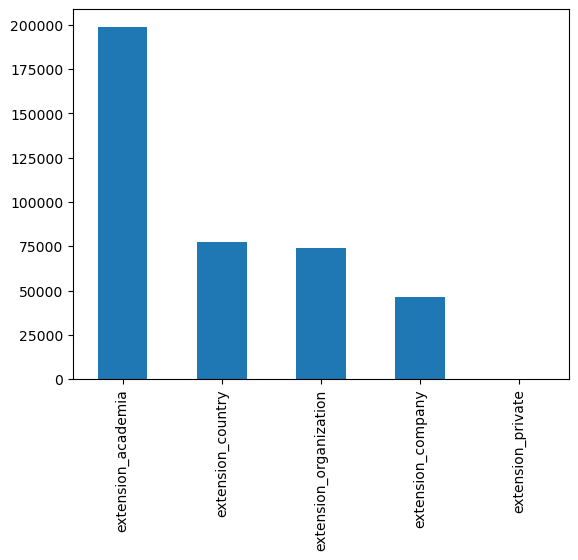

In [41]:
# Most entries have an email with an extension related to the academia
df_extension.sum(axis=0).plot(kind='bar')

### 2.3 Process Timestamp

In [42]:
# Example value: 2021-05-18T11:17:37.625000
df['date'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d')
df['month'] = df['date'].dt.month_name().str.slice(stop=3)
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day

In [43]:
# Only one year
df['year'].unique()

array([2021])

In [44]:
# Only one month
df['month'].unique()

array(['May'], dtype=object)

In [45]:
# Apparently, the searches spread across all May 2021 work days
# are contained in the dataset.
# Probably no relevant information is contained in the timestamp.
# Exception: if each search is associated with different agents
# that contact expert candidates. I assume that's not the case.
# The timestamp could be a relevant factor if it's spread across
# an entire year, because it would comprise a complete cycle in which
# stress and motivation oscillate. I can image that those
# human factors affect the outreach success.
sorted(df['day'].unique())

[4, 5, 6, 7, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28]

### 2.4 Assemble Engineered Columns

In [46]:
df.columns

Index(['person-id', 'timestamp', 'search-id', 'search-ranking', 'countries',
       'email-domains', 'outreach-success', 'date', 'month', 'year', 'day'],
      dtype='object')

In [47]:
data = df[['person-id', 'search-id', 'search-ranking', 'outreach-success', 'day']]

In [48]:
data = pd.concat([data, df_country, df_emails, df_extension], axis=1)

In [49]:
list(data.columns)

['person-id',
 'search-id',
 'search-ranking',
 'outreach-success',
 'day',
 'countries_AE',
 'countries_AI',
 'countries_AR',
 'countries_AS',
 'countries_AT',
 'countries_AU',
 'countries_AZ',
 'countries_BD',
 'countries_BE',
 'countries_BG',
 'countries_BH',
 'countries_BM',
 'countries_BO',
 'countries_BR',
 'countries_BS',
 'countries_BT',
 'countries_BW',
 'countries_CA',
 'countries_CH',
 'countries_CL',
 'countries_CM',
 'countries_CN',
 'countries_CO',
 'countries_CR',
 'countries_CS',
 'countries_CU',
 'countries_CZ',
 'countries_DE',
 'countries_DK',
 'countries_DM',
 'countries_DZ',
 'countries_EE',
 'countries_EG',
 'countries_ES',
 'countries_ET',
 'countries_FI',
 'countries_FR',
 'countries_GB',
 'countries_GE',
 'countries_GH',
 'countries_GR',
 'countries_GT',
 'countries_GU',
 'countries_GY',
 'countries_HK',
 'countries_HN',
 'countries_HR',
 'countries_HU',
 'countries_ID',
 'countries_IE',
 'countries_IL',
 'countries_IN',
 'countries_IO',
 'countries_IR',
 'coun

### 2.5 Reduce Entries to Experts

The reasoning behind reducing search result entries to expert entries is the following: 

- I assume that each expert will get a generic contact email.
- The outreach success depends on the expert answering the contact.
- Carefully aggregating each expert search data makes sense, because it is the expert the factor which yields to successful contact, not the search.

There might be cases in which that reasoning (and the related assumptions) are incorrect, e.g.:

- The contact emails are not that generic, but customized.
- ...

In [50]:
data.shape

(371772, 129)

In [51]:
data.head()

,person-id,search-id,search-ranking,outreach-success,day,countries_AE,countries_AI,countries_AR,countries_AS,countries_AT,...,countries_VN,countries_ZA,countries_ZW,num_countries,num_email-domains,extension_academia,extension_country,extension_organization,extension_company,extension_private
0,93033378-8207-4c9f-bfa5-95b520f7c760,a6380bba-b203-48dc-bbd6-5cb58b12ee07,1,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,18a3bd6b-5665-4f08-aae4-66f2219100b3,a6380bba-b203-48dc-bbd6-5cb58b12ee07,2,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,21e9d97a-0940-4fcf-825a-e4a118d01b1b,a6380bba-b203-48dc-bbd6-5cb58b12ee07,3,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,aUlZWRzbXY7Ev5VCWo8Zag_0000,a6380bba-b203-48dc-bbd6-5cb58b12ee07,4,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0
4,2e23c461-d817-4d6c-af0b-b3567e63b878,a6380bba-b203-48dc-bbd6-5cb58b12ee07,5,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0


In [52]:
# After cleaning and preprocessing we have 371772 entries
# but if we ignore the search-id and drop duplicates
# we get 269897 unique entries; i.e., 371772-269897 entries
# are identical but belong to different searches 
data.drop('search-id', axis=1).drop_duplicates().shape

(272048, 128)

In [53]:
# In order to aggregate/reduce the dataset to the experts
# we need to group by person-id and apply aggregate functions:
# - count
# - median
# - max / min
# - etc.
# Note that there are 198 entries with person-id #NAME?
data.drop('search-id', axis=1).groupby('person-id')['person-id'].count()

person-id
#NAME?                         198
--0thaA7rneCMDYAVlzh2w_0000      2
--9CXiA-i3-GLAtPrjBqQQ_0000      1
-13B7zGE0jfD8BP1ZCnmwg_0000      1
-16Mclmc2cZOcJ0-vw52oA_0000      3
                              ... 
zv3zprP8c60BsPhRcusSPw_0000      1
zvfTrr8WvT5ZdiBKu2TJZA_0000      4
zySQFPs7rNvHQ9Vm2dhL2A_0000      2
zyxxCMp7HI1PGBIS7DB1EQ_0000      2
zz0o0N3XyaEZcdlVbLEXvg_0000      3
Name: person-id, Length: 167096, dtype: int64

In [54]:
# There are 198 entries with person-id #NAME?
# We could fix the #NAME? entries by grouping the by emain-domains
# and setting the email-domain as person-id instead of the id hash.
# However, I won't do that in order to avoid over-engineering.
# Additionally:
# - Names should be resolved upstream.
# - Only one entry from those 198 has a successful outreach
df[df['person-id']=='#NAME?'].groupby('email-domains')['outreach-success'].max()

email-domains
abbott.com                                       0
amgen.com,gmail.com,verizon.net                  0
aol.com                                          0
archildrens.org                                  0
baltimorefaces.com                               0
                                                ..
yahoo.com,novartis.com,vanderbilt.edu,aol.com    0
yahoo.com,quintiles.com,mdvip.com                0
yahoo.com,sbcglobal.net,msn.com                  0
yahoo.com,va.gov,ucsf.edu                        0
zambongroup.com                                  0
Name: outreach-success, Length: 74, dtype: int64

In [55]:
df[df['person-id']=='#NAME?'].groupby('email-domains')['outreach-success'].max().sum()

1

In [56]:
# Drop entries with person-id #NAME?
data.loc[data['person-id']=='#NAME?','person-id'] = None
data = data.dropna()

In [57]:
# Experts without name were removed successfully
data.drop('search-id', axis=1).groupby('person-id')['person-id'].count()

person-id
--0thaA7rneCMDYAVlzh2w_0000    2
--9CXiA-i3-GLAtPrjBqQQ_0000    1
-13B7zGE0jfD8BP1ZCnmwg_0000    1
-16Mclmc2cZOcJ0-vw52oA_0000    3
-1IIFTLlBmVHkQBWojRkWw_0000    5
                              ..
zv3zprP8c60BsPhRcusSPw_0000    1
zvfTrr8WvT5ZdiBKu2TJZA_0000    4
zySQFPs7rNvHQ9Vm2dhL2A_0000    2
zyxxCMp7HI1PGBIS7DB1EQ_0000    2
zz0o0N3XyaEZcdlVbLEXvg_0000    3
Name: person-id, Length: 167095, dtype: int64

In [58]:
data.head()

,person-id,search-id,search-ranking,outreach-success,day,countries_AE,countries_AI,countries_AR,countries_AS,countries_AT,...,countries_VN,countries_ZA,countries_ZW,num_countries,num_email-domains,extension_academia,extension_country,extension_organization,extension_company,extension_private
0,93033378-8207-4c9f-bfa5-95b520f7c760,a6380bba-b203-48dc-bbd6-5cb58b12ee07,1,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,18a3bd6b-5665-4f08-aae4-66f2219100b3,a6380bba-b203-48dc-bbd6-5cb58b12ee07,2,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,21e9d97a-0940-4fcf-825a-e4a118d01b1b,a6380bba-b203-48dc-bbd6-5cb58b12ee07,3,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,aUlZWRzbXY7Ev5VCWo8Zag_0000,a6380bba-b203-48dc-bbd6-5cb58b12ee07,4,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0
4,2e23c461-d817-4d6c-af0b-b3567e63b878,a6380bba-b203-48dc-bbd6-5cb58b12ee07,5,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0


#### Persist Preprocesed Dataset

In [59]:
data.to_csv('data/data_Nov_2022_preprocessed.csv', sep=',', header=True, index=False)
data = pd.read_csv('data/data_Nov_2022_preprocessed.csv')

In [60]:
data.head()

,person-id,search-id,search-ranking,outreach-success,day,countries_AE,countries_AI,countries_AR,countries_AS,countries_AT,...,countries_VN,countries_ZA,countries_ZW,num_countries,num_email-domains,extension_academia,extension_country,extension_organization,extension_company,extension_private
0,93033378-8207-4c9f-bfa5-95b520f7c760,a6380bba-b203-48dc-bbd6-5cb58b12ee07,1,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,18a3bd6b-5665-4f08-aae4-66f2219100b3,a6380bba-b203-48dc-bbd6-5cb58b12ee07,2,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,21e9d97a-0940-4fcf-825a-e4a118d01b1b,a6380bba-b203-48dc-bbd6-5cb58b12ee07,3,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,aUlZWRzbXY7Ev5VCWo8Zag_0000,a6380bba-b203-48dc-bbd6-5cb58b12ee07,4,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0
4,2e23c461-d817-4d6c-af0b-b3567e63b878,a6380bba-b203-48dc-bbd6-5cb58b12ee07,5,0,26,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0


#### New Reduced Dataset

I create a new dataset in which we have an entry for each expert, with the following (aggregated) features:

- `person_id`: person id or hash; all the other features are related to that person/expert
- `num_searches`: number of times the expert appears in the original (preprocessed) dataset
- `ranking_min`: minimum search ranking position value in the original (preprocessed) dataset
- `ranking_max`: maximum search ranking position value in the original (preprocessed) dataset
- `ranking_median`: median search ranking position value in the original (preprocessed) dataset
- `outreach_min`: minimum outreach success value in the original (preprocessed) dataset
- `outreach_max`: maximum outreach success value in the original (preprocessed) dataset
- `num_emails`: number of emails the expert/person
- `num_countries`: number of countries associated to the expert/person
- `extension_*`: email extension types associate to the expert/person (5 columns: academia, country, etc.)
- `country_*`: countries associated to the expert/person (117 columns: UK, US, ..., etc.)

In [61]:
# Person id index for the reduced dataset
# Note that groupby yields sorted values by default,
# but I explicitly request it so that it's clear and to avoid version issues
index = data.drop('search-id', axis=1).groupby('person-id', sort=True)['person-id'].count().index
print(index)

Index(['--0thaA7rneCMDYAVlzh2w_0000', '--9CXiA-i3-GLAtPrjBqQQ_0000',
       '-13B7zGE0jfD8BP1ZCnmwg_0000', '-16Mclmc2cZOcJ0-vw52oA_0000',
       '-1IIFTLlBmVHkQBWojRkWw_0000', '-22S41RxUbnw4w0AnA5B4g_0000',
       '-28IevIMxIl4ulsqND6Ujw_0000', '-2BiY25kMtNEs2epfMxptQ_0000',
       '-3WodEdm5WeDJRJLLQa4QA_0000', '-3lsDr9syOp1AO0VS-6Z4w_0000',
       ...
       'zr2Kv2CPD5bFDPrQsQFT2Q_0000', 'ztiqNOjjKBBlSojpN4vFUA_0000',
       'zu14RMvWAzgBqcRAb0yghQ_0000', 'zu6PH5ukpyTcg9ZuPb9OUw_0000',
       'zuQM6-S3799zqBJ300643A_0000', 'zv3zprP8c60BsPhRcusSPw_0000',
       'zvfTrr8WvT5ZdiBKu2TJZA_0000', 'zySQFPs7rNvHQ9Vm2dhL2A_0000',
       'zyxxCMp7HI1PGBIS7DB1EQ_0000', 'zz0o0N3XyaEZcdlVbLEXvg_0000'],
      dtype='object', name='person-id', length=167095)


In [62]:
data.groupby('person-id')['person-id'].count().values

array([2, 1, 1, ..., 2, 2, 3])

In [63]:
def create_experts_dataset(data):
    """Given a preprocessed dataset, create a new reduced
    data frame which has a single entry for each expert with their
    aggregate values.
    
    NOTE: This function can be currently used
    with the present preprocessed dataset.
    I coukd be factored to be more re-usable, e.g.,
    by passing a dictionary which maps column names
    in the input data frame with output column names
    and the required aggregate functions.
    
    Arguments:
        data: preprocessed dataframe
    Returns:
        df_experts: dataframe reduced to expert aggregated values
    """
    # Empty data frame
    df_experts = pd.DataFrame()
    
    # Single columns
    # Note that groupby yields sorted values by default,
    # but I explicitly request it so that it's clear and to avoid version issues
    groups = data.groupby('person-id', sort=True)
    df_experts['person_id'] = groups['person-id'].count().index
    df_experts['num_searches'] = groups['person-id'].count().values
    df_experts['ranking_min'] = groups['search-ranking'].min().values
    df_experts['ranking_max'] = groups['search-ranking'].max().values
    df_experts['ranking_median'] = groups['search-ranking'].median().values
    df_experts['outreach_min'] = groups['outreach-success'].min().values
    df_experts['outreach_max'] = groups['outreach-success'].max().values
    df_experts['num_emails'] = groups['num_email-domains'].max().values
    df_experts['num_countries'] = groups['num_countries'].max().values
    
    # One-hot encoded columns
    col_countries = [col for col in data.columns if col.startswith('countries_')]
    col_extensions = [col for col in data.columns if col.startswith('extension_')]
    df_tmp_contries = pd.DataFrame(groups[col_countries].max().values,
                                   columns = col_countries)
    df_tmp_extensions = pd.DataFrame(groups[col_extensions].max().values,
                                     columns = col_extensions)
    
    # Concatenate single & one-hot encoded data frames
    df_experts = pd.concat([df_experts,df_tmp_extensions,df_tmp_contries],
                           axis=1)
    
    return df_experts

In [64]:
df_experts = create_experts_dataset(data)

In [65]:
df_experts.head()

,person_id,num_searches,ranking_min,ranking_max,ranking_median,outreach_min,outreach_max,num_emails,num_countries,extension_academia,...,countries_TW,countries_TZ,countries_UA,countries_US,countries_UY,countries_VC,countries_VE,countries_VN,countries_ZA,countries_ZW
0,--0thaA7rneCMDYAVlzh2w_0000,2,228,292,260.0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,--9CXiA-i3-GLAtPrjBqQQ_0000,1,1668,1668,1668.0,0,0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-13B7zGE0jfD8BP1ZCnmwg_0000,1,2938,2938,2938.0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-16Mclmc2cZOcJ0-vw52oA_0000,3,153,2552,156.0,0,0,3.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1IIFTLlBmVHkQBWojRkWw_0000,5,798,898,804.0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# Persist the reduced experts dataset
df_experts.to_csv('data/data_Nov_2022_reduced_experts.csv', sep=',', header=True, index=False)
df_experts = pd.read_csv('data/data_Nov_2022_reduced_experts.csv')

In [67]:
df_experts.head()

,person_id,num_searches,ranking_min,ranking_max,ranking_median,outreach_min,outreach_max,num_emails,num_countries,extension_academia,...,countries_TW,countries_TZ,countries_UA,countries_US,countries_UY,countries_VC,countries_VE,countries_VN,countries_ZA,countries_ZW
0,--0thaA7rneCMDYAVlzh2w_0000,2,228,292,260.0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,--9CXiA-i3-GLAtPrjBqQQ_0000,1,1668,1668,1668.0,0,0,2.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-13B7zGE0jfD8BP1ZCnmwg_0000,1,2938,2938,2938.0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-16Mclmc2cZOcJ0-vw52oA_0000,3,153,2552,156.0,0,0,3.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1IIFTLlBmVHkQBWojRkWw_0000,5,798,898,804.0,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.6 Data Processing: Findings and Next Steps


Summary of findings, conclusions:

- All entries contain 117 possible countries: we can encode them as dummy variables. Most entries have a unique country (see bar plot).

- The number of emails per entry follows an exponential distribution; most entries have one email.

- There are maybe too many unique emails (20,355) to encode them as dummy variables and use them effectively. Additionally, new entries would probably introduce new email domains. Therefore, I think it is more effective to extract information from the email domains; as a first approach, I have manually classified the extensions to belong to these groups: `academia`, `country`, `organization`, `company`, `private`. However, further information could be extracted, for instance web scrapping the site of each domain:

    - Discipline: oncology, pediatrics, etc.
    - Size of institution: small (<50), medium (50-150), large (>150)
    - Type of center: university, research center, hospital/clinic, etc.
    - Prestige/ranking of the institution
    - ...

- Note that in my manual encoding of email extension classes I have not classified all extensions (but only 98 / 226); there are some extensions which seem to be incorrect, or at least I'm not familiar with them. That deserves more investigation.

- Most entries have an email with an extension related to the academia (see bar plot).

- The searches are spread across all May 2021 work days. Probably no relevant information is contained in the timestamp; one exception to that assumption would be if each search is associated with different agents that contact expert candidates (i.e., because of the type of approaching, etc.). I assume that's not the case. However, the timestamp could be a relevant factor if it's spread across an entire year, because it would comprise a complete cycle in which stress and motivation oscillate. I hypothesize that those human factors affect the outreach success.

- I have created a reduced experts dataset in which each expert/person has an entry with aggregate values. The reasoning behind reducing search result entries to expert entries is the following: 

    - I assume that each expert will get a generic contact email.
    - The outreach success depends on the expert answering the contact.
    - Carefully aggregating each expert search data makes sense, because it is the expert the factor which yields to successful contact, not the search.

- There might be cases in which the reasoning (and the related assumptions) for the dataset reduction are incorrect, e.g., when the contact emails are not that generic, but customized.

- There are 198 entries with person-id "#NAME?". We could fix those entries by grouping by `email-domains` and setting the `email-domain` as `person-id` instead of the id hash. However, I won't do that in order to avoid over-engineering. Additionally:

    - Names/ids should/could be resolved upstream.
    - Only one entry from those 198 has a successful outreach

- The reduced dataset contains 167,095 entries, i.e., unique experts. Each entry has 131 columns.

Next steps:

- Segregate reduced dataset in outreach success / no success.
- Explore differences: plots & hypothesis tests.

Extra points:

- Clustering of entries: after extracting more information from email domains we could perform a clustering of experts. Hypothesis: some clusters will have a significantly larger outreach success rate.

## 3. More Exploratory Data Analysis and Hypothesis Testing

We have carried out several exploratory analyses while pre-processing the dataset, but we can further explore questions using the reduced experts data frame.

Goals:

- Segregate the dataset in splits with experts associated *with a successful outreach* and a experts *without*.
- Answer interesting questions.
- Perform hypothesis tests: compare the features of both splits.

In [68]:
df_experts.shape

(167095, 131)

In [69]:
# Split with negative outreach (nosuccess)
df_experts_0 = df_experts[df_experts['outreach_max']<1]
# Split with positive outreach (success)
df_experts_1 = df_experts[df_experts['outreach_max']>0]

In [70]:
# Experts without successful outreach: 165575
df_experts_0.shape

(165575, 131)

In [71]:
# Experts with successful outreach: 1520
df_experts_1.shape

(1520, 131)

In [72]:
print(f'Ratio of experts that are associated with a successful outreach: {df_experts_1.shape[0]/df_experts.shape[0]}')

Ratio of experts that are associated with a successful outreach: 0.009096621682276549


In [73]:
# Experts who have both a negative and a positive outreach outcome
df_experts[(df_experts['outreach_max'] > 0) & (df_experts['outreach_min'] < 1)].shape

(1117, 131)

In [74]:
# Experts who have only a positive outreach outcome
df_experts[(df_experts['outreach_max'] > 0) & (df_experts['outreach_min'] > 0)].shape

(403, 131)

#### Ranking Distributions

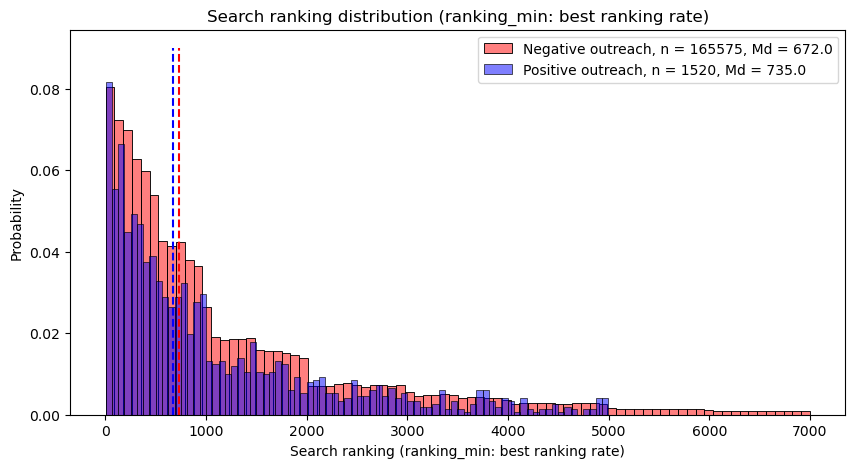

In [75]:
# Plot histograms of ranking rate distributions for splits of positive outreach
# and of negative outreach.
# Note: histograms are normalized.
# For all ranking rate aggregates (min, max, median), the normalized distributions seem very similar.
plt.figure(figsize=(10,5))
feature = 'ranking_min'
median_positive = df_experts_1[feature].median()
median_negative = df_experts_0[feature].median()
sns.histplot(df_experts_0[feature], bins=80, color='red', alpha=0.5, stat='probability')
sns.histplot(df_experts_1[feature], bins=80, color='blue', alpha=0.5, stat='probability')
plt.legend([f'Negative outreach, n = {df_experts_0.shape[0]}, Md = {median_positive}',
            f'Positive outreach, n = {df_experts_1.shape[0]}, Md = {median_negative}'])
plt.plot([median_positive, median_positive], [0,0.09], color='blue', linestyle='--')
plt.plot([median_negative, median_negative], [0,0.09], color='red', linestyle='--')
plt.xlabel(f'Search ranking ({feature}: best ranking rate)')
plt.title(f'Search ranking distribution ({feature}: best ranking rate)')
plt.savefig('./assets/search_ranking_distribution.png',
            dpi=300, transparent=False, bbox_inches='tight')

#### Box Plots

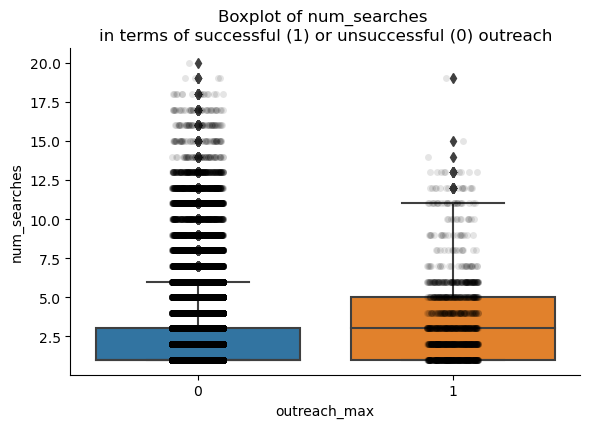

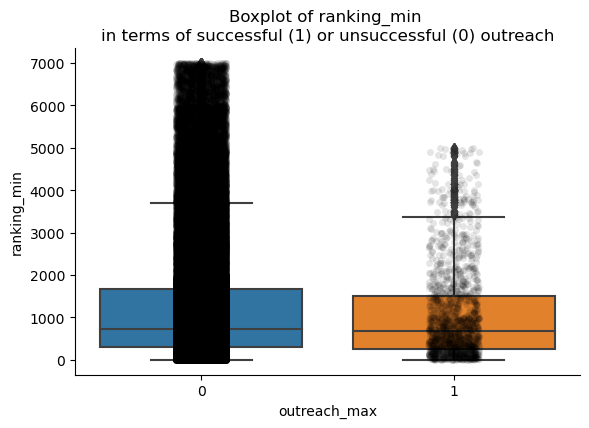

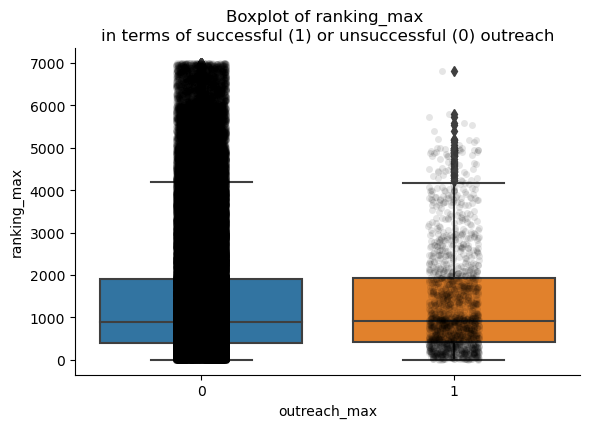

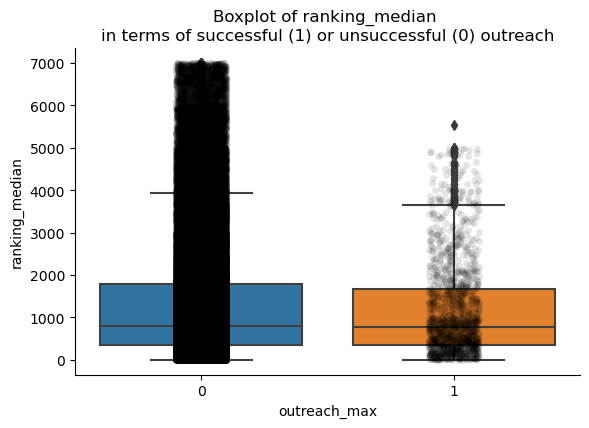

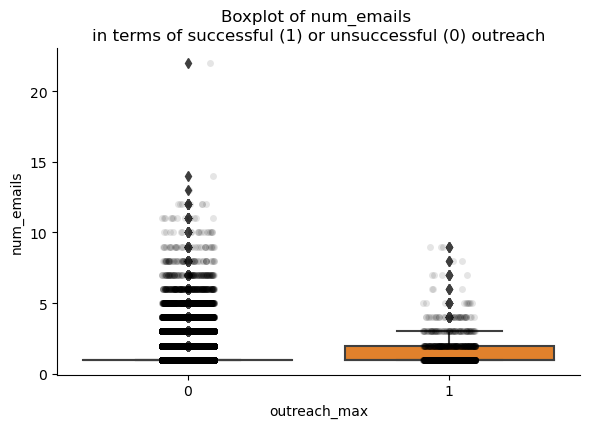

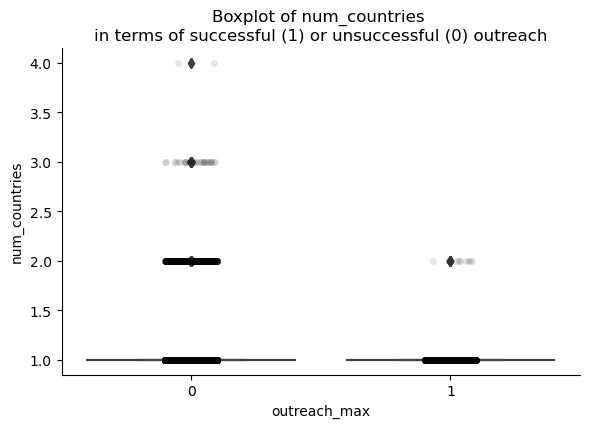

In [76]:
# Boxplots
# Variables that seem to be associated with significant differences:
# - num_searches: number of times an expert has appeared
# - num_emails: number of emails available for an expert
numerical_features = ['num_searches', 'ranking_min', 'ranking_max', 'ranking_median', 'num_emails', 'num_countries']
for var in numerical_features:
    sns.catplot(x='outreach_max', y=var, data=df_experts, kind="box", height=4, aspect=1.5)
    # Data points
    sns.stripplot(x='outreach_max', y=var, data=df_experts, jitter=0.1, alpha=0.1, color='k')
    plt.title(f'Boxplot of {var} \nin terms of successful (1) or unsuccessful (0) outreach')
    plt.show()

#### Bar Plots

In [77]:
# One-hot encoded columns
col_countries = [col for col in df_experts.columns if col.startswith('countries_')]
col_extensions = [col for col in df_experts.columns if col.startswith('extension_')]

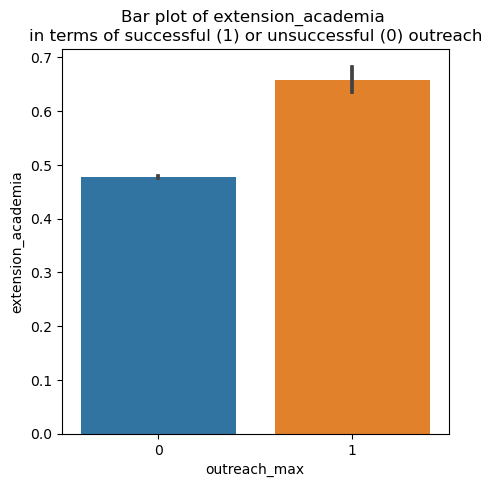

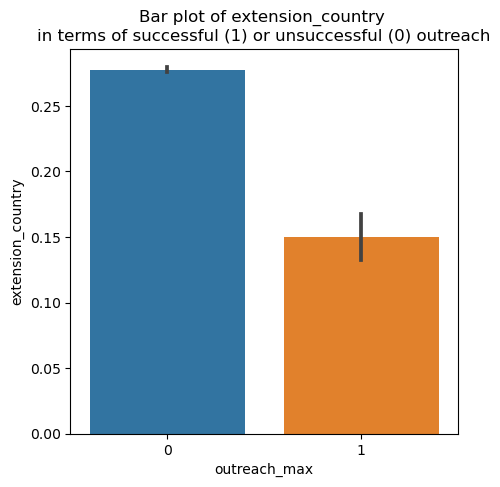

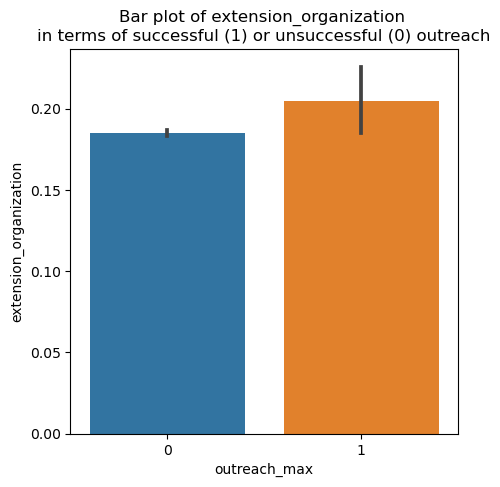

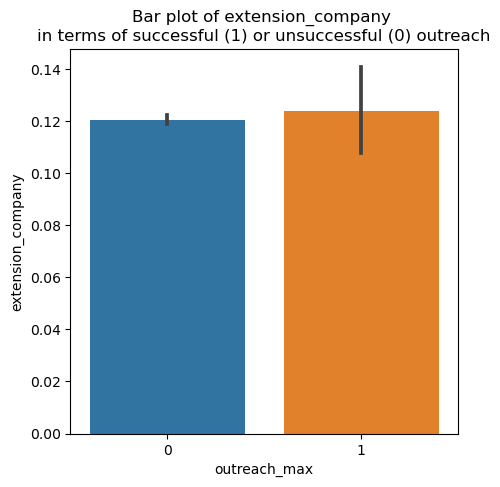

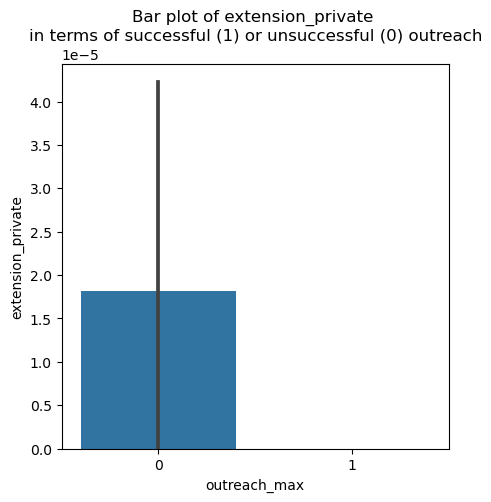

In [78]:
# Bar plots
# Apparent signifficant diffrences:
# - extension_academia
# - extension_country
# - extension_organization
#binary_features = col_countries + col_extensions
binary_features = col_extensions
for var in binary_features:
    plt.figure(figsize=(5,5))
    sns.barplot(x='outreach_max', y=var, data=df_experts, estimator=np.mean)
    plt.title(f'Bar plot of {var} \nin terms of successful (1) or unsuccessful (0) outreach')
    plt.show()

### 3.2 Hypothesis Tests

I will carry out hypothesis tests (T Tests and Z Tests) and plot the statistics to see which are the features that most affect on the positive outreach.

Hypothesis testing helps identifying whether two samples belong to the same population by comparing their means (e.g., T Test) or proportions (Z Test). A significance level is chosen, `alpha`, and if the probability of the computed statstic yields a smaller `p-value`, both samples are considered to be different. Usually `alpha = 0.05`, which is associated with a `T` or `Z` value close to 2.

Note that in a formal setting we should check that the assumptions/requirements for applying the tests are met (normal distributions, etc.); however, here I skip that step to simplify the solution.

The computation is the following:

- For each feature, we split the dataset in entries with positve and negative outreach.
- For each feature, we compute the T/Z statstic, which captures the mean/proportion differences scaled by the standard error.
- If the absolute value of the statistic is large (> 2, i.e., p < 0.05, aprox.), the analyzed feature has two distinct distirbutions for positive and negative outreach.


#### Auxiliary Functions: T Test, Z Test

In [79]:
def z_test(subset1, subset2):
    '''This function computes the Z Test of two population proportions.
    
    H0: The proportions are the same.
    Ha: The proportions are different (two-sided).
    
    Arguments:
        subset1: data frame with values to analyze for subset/group 1
        subset1: data frame with values to analyze for subset/group 2
    Returns:
        z_stat: Z statistic; if very negative, subset1 has a considerebly smaller proportion
        p_value: if < alpha = 0.05, the difference is significant, the two proportions are different
    '''
    # Sample sizes
    n1 = subset1.shape[0]
    n2 = subset2.shape[0]
    
    # Number of positive values
    y1 = subset1.sum()
    y2 = subset2.sum()

    # Estimates of the population proportions
    p1 = np.round(y1 / n1, 2)
    p2 = np.round(y2 / n2, 2)
    
    if p1 == p2:
        print('Warning: same proportions!')

    # Estimate of the combined population proportion
    phat = (y1 + y2) / (n1 + n2)

    # Estimate of the variance of the combined population proportion
    va = phat * (1 - phat)

    # Estimate of the standard error of the combined population proportion
    se = np.sqrt(va * ((1.0 / n1) + (1.0 / n2)))

    # Test statistic and its p-value: 2-sided, because the Ha is !=
    z_stat = (p1 - p2) / se
    p_value = 2*dist.norm.cdf(-np.abs(z_stat))
    # Equivalent to
    # p_value = 2*(1-dist.norm.cdf(np.abs(z_stat)))

    return (z_stat, p_value, p1, p2)

In [80]:
def t_test(subset1, subset2):
    '''This function computes the T Test of two population means.
    
    H0: The means are the same.
    Ha: The means are different (two-sided).

    Arguments:
        subset1: data frame with values to analyze for subset/group 1
        subset1: data frame with values to analyze for subset/group 2
    Returns:
        t_stat: T statistic; if very negative, subset1 has a considerebly smaller mean
        p_value: if < alpha = 0.05, the difference is significant, the two distribution means are different
    '''
    
    # Sample sizes    
    n1 = subset1.shape[0]
    n2 = subset2.shape[0]
    
    # Means
    m1 = subset1.mean()
    m2 = subset2.mean()

    # Standard Deviations
    sd1 = subset1.std()
    sd2 = subset2.std()

    # Standard Error
    if sd1/sd2 < 2.0 or sd2/sd1 < 2.0:
        # Similar variances: Pooled
        se = np.sqrt(((sd1**2)/n1) + ((sd2**2)/n2))
    else:
        # Different variances: Unpooled
        se = np.sqrt(((n1-1)*sd1**2 + (n2-1)*sd2**2)/(n1+n2-2)) * np.sqrt((1/n1) + (1/n2))
    
    # T statistic
    t_stat = (m1 - m2)/se    
    # With T and df, we can get the p-value from the T distribution
    df = n1 + n2 - 2
    # p-value is obtained form the cummulative density function (CDF) with the given df
    # since we want the remaining are under the PDF, we need to compute 1-CDF(t)
    # Since it is a 2-sided test (Ha !=), we need to x2 the p-value
    p_value = 2*(1 - dist.t.cdf(np.abs(t_stat),df=df))
    
    return (t_stat, p_value, m1, m2)

#### Hypothesis Tests

In [81]:
features = col_countries + col_extensions + numerical_features
features_in_both_groups = []
features_in_one_group = []
feature_stats = {}
feature_ps = {}

for feat in features:
    # Select subsets
    subset1 = df_experts_0[feat]
    subset2 = df_experts_1[feat]

    if subset1.sum() > 0 and subset2.sum() > 0:
        # Decide T-test / Z-test
        if len(subset1.value_counts()) > 2:
            # T-test
            (stat, p_value, m1, m2) = t_test(subset1, subset2)    
        else:
            # Z-test
            (stat, p_value, p1, p2) = z_test(subset1, subset2)
        # Save values
        features_in_both_groups.append(feat)
        feature_stats[feat] = stat
        feature_ps[feat] = p_value
    else:
        features_in_one_group.append(feat)

In [82]:
# Create data frame with stats
feature_differences = pd.DataFrame.from_dict(feature_stats, orient='index')
feature_differences.columns = ['stat']

In [83]:
# Features compared: 25
feature_differences.shape

(25, 1)

In [84]:
# Features that appeared in a unique split, so could not be compared: 103
len(features_in_one_group)

103

In [85]:
# Take only absolute stat value
# but save the stat sign; positive sign means first group has larger aggregate (proportion/mean)
feature_differences['plus'] = feature_differences['stat'].apply(lambda col: 1 if col > 0 else 0)
feature_differences['stat'] = np.abs(feature_differences['stat'])

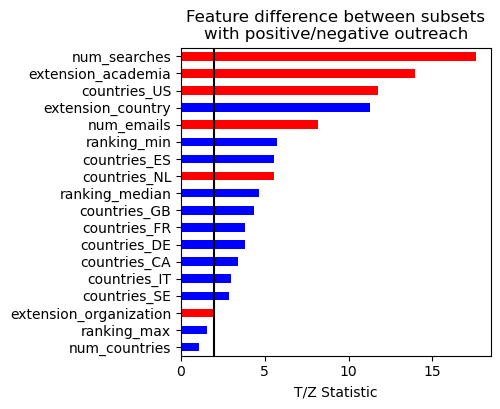

In [89]:
# Pick top k features with largest stats
# Plot their abs stat value; color-code the stat sign
# Draw the stat = 2 line, related to the significance level difference
top_features = 18
plt.figure(figsize=(4,4))
feature_differences.sort_values(by='stat', ascending=True, inplace=True)
color_list = ['b' if el > 0 else 'r' for el in [feature_differences['plus'].iloc[i] for i in range(feature_differences['plus'].shape[0])]]
feature_differences['stat'][-top_features:].plot(kind='barh', color=color_list[-top_features:])
plt.plot([2,2], [-1,top_features], 'k-')
plt.xlabel('T/Z Statistic')
plt.title('Feature difference between subsets\nwith positive/negative outreach')
plt.savefig('./assets/feature_comparison_test.png', dpi=200, transparent=False, bbox_inches='tight')

### 3.3 EDA and Hypothesis Tests: Findings

- Experts without successful outreach: 165575
- Experts with successful outreach: 1520
- Percentage of experts that are associated with a successful outreach: 0.9%
- Experts who have both a negative and a positive outreach outcome: 1117
- Experts who have only a positive outreach outcome: 403
- Histograms of ranking rate distributions for splits of positive and negative outreach (see notebook).
- Box plots: numerical variables (see notebook).
- Bar plots: binary variables (see notebook).
- Hypothesis tests: Hypothesis testing helps identifying whether two samples belong to the same population by comparing their means (e.g., T Test) or proportions (Z Test). A significance level is chosen, `alpha`, and if the probability of the computed statstic yields a smaller `p-value`, both samples are considered to be different. Usually `alpha = 0.05`, which is associated with a `T` or `Z` value close to 2. The computation is the following:

	- For each feature, we split the dataset in entries with positve and negative outreach.
	- For each feature, we compute the T/Z statstic, which captures the mean/proportion differences scaled by the standard error.
	- If the absolute value of the statistic is large (> 2, i.e., p < 0.05, aprox.), the analyzed feature has two distinct distirbutions for positive and negative outreach.

- Results of the hypothesis test:

	- The following experts are associated with positive outreach, thus, their ranking should be minimized (smaller ranking is better):
		- num_searches
		- email extension: academia
		- countries: US, NL
		- num_emails

	- The following features are associated with negative outreach, thus, their ranking should be maximized:
		- email extension: country
		- countries: ES, GB, FR, DE, CA, IT, SE

- Note that in a formal setting we should check that the assumptions/requirements for applying the tests are met (normal distributions, etc.); however, here I skip that step to simplify the solution. Also note that only 25 features were checked, because these are the ones that appear in both splits.